In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

In [2]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:43241 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 8 Memory: 34.36 GB


In [3]:
import cosima_cookbook as cc
session = cc.database.create_session()

In [4]:
db = '/scratch/x77/db6174/access-om2/archive/databases/cc_database_nostress_total.db'
session = cc.database.create_session(db)
expt = ['025deg_jra55_ryf_nostress_cont','025deg_jra55_ryf_nostress']
names = {'025deg_jra55_ryf_nostress_cont':'Control','025deg_jra55_ryf_nostress':'No Stress'}

In [6]:
vars_025deg = cc.querying.get_variables(session, experiment= expt[1])
vars_025deg[vars_025deg['name'].str.lower().str.match('w')]

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
388,wfiform,water out of ocean due to ice form (>0 enters ...,1 monthly,output027/ocean/ocean-2d-wfiform-1-monthly-mea...,56,1900-01-01 00:00:00,1956-01-01 00:00:00
389,wfimelt,water into ocean due to ice melt (>0 enters oc...,1 monthly,output027/ocean/ocean-2d-wfimelt-1-monthly-mea...,56,1900-01-01 00:00:00,1956-01-01 00:00:00
390,wt,dia-surface velocity T-points,1 monthly,output027/ocean/ocean-3d-wt-1-monthly-mean-ym_...,56,1900-01-01 00:00:00,1956-01-01 00:00:00


In [6]:
x_min = -90
x_max = 10
y_min = 10
y_max = 65
salt_con_1950 = cc.querying.getvar(expt[0],'salt',session,start_time='1949-01-01',end_time = '1950-12-31')#.sel(
#    xt_ocean = slice(x_min,x_max)).sel(yt_ocean = slice(y_min,y_max))#.sel(st_ocean = 3.5, method = 'nearest')
salt_buo_1950 = cc.querying.getvar(expt[1],'salt',session,start_time='1949-01-01',end_time = '1950-12-31')#.sel(
#    xt_ocean = slice(x_min,x_max)).sel(yt_ocean = slice(y_min,y_max))#.sel(st_ocean = 3.5, method = 'nearest')

In [ ]:
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(20,30))

(salt_con_1950 - salt_buo_1950).sel(st_ocean = 1, method = 'nearest').sel(time = slice('1949-01-01','1950-12-31')).mean('time').plot.contourf(ax = axes[0][0],levels = np.linspace(-12,12,21))
axes[0][0].set_title('Salinity Difference - st_ocean = 1')

(salt_con_1950 - salt_buo_1950).sel(st_ocean = 10, method = 'nearest').sel(time = slice('1949-01-01','1950-12-31')).mean('time').plot.contourf(ax = axes[0][1],levels = np.linspace(-12,12,21))
axes[0][1].set_title('Salinity Difference - st_ocean = 10')

(salt_con_1950 - salt_buo_1950).sel(st_ocean = 50, method = 'nearest').sel(time = slice('1949-01-01','1950-12-31')).mean('time').plot.contourf(ax = axes[1][0],levels = np.linspace(-6,6,21))
axes[1][0].set_title('Salinity Difference - st_ocean = 50')

(salt_con_1950 - salt_buo_1950).sel(st_ocean = 100, method = 'nearest').sel(time = slice('1949-01-01','1950-12-31')).mean('time').plot.contourf(ax = axes[1][1],levels = np.linspace(-6,6,21))
axes[1][1].set_title('Salinity Difference - st_ocean = 100')

(salt_con_1950 - salt_buo_1950).sel(st_ocean = 500, method = 'nearest').sel(time = slice('1949-01-01','1950-12-31')).mean('time').plot.contourf(ax = axes[2][0],levels = np.linspace(-2,2,21))
axes[2][0].set_title('Salinity Difference - st_ocean = 500')

(salt_con_1950 - salt_buo_1950).sel(st_ocean = 1000, method = 'nearest').sel(time = slice('1949-01-01','1950-12-31')).mean('time').plot.contourf(ax = axes[2][1],levels = np.linspace(-0.4,0.4,21))
axes[2][1].set_title('Salinity Difference - st_ocean = 1000')

(salt_con_1950 - salt_buo_1950).sel(st_ocean = 2000, method = 'nearest').sel(time = slice('1949-01-01','1950-12-31')).mean('time').plot.contourf(ax = axes[3][0],levels = np.linspace(-0.1,0.1,21))
axes[3][0].set_title('Salinity Difference - st_ocean = 2000')

(salt_con_1950 - salt_buo_1950).sel(st_ocean = 5000, method = 'nearest').sel(time = slice('1949-01-01','1950-12-31')).mean('time').plot.contourf(ax = axes[3][1])
axes[3][1].set_title('Salinity Difference - st_ocean = 5000')

In [8]:
salt_con_1901 = cc.querying.getvar(expt[0],'salt',session,start_time='1900-01-01',end_time = '1901-12-31')#.sel(
#    xt_ocean = slice(x_min,x_max)).sel(yt_ocean = slice(y_min,y_max))#.sel(st_ocean = 3.5, method = 'nearest')
salt_buo_1901 = cc.querying.getvar(expt[1],'salt',session,start_time='1900-01-01',end_time = '1901-12-31')#.sel(
#    xt_ocean = slice(x_min,x_max)).sel(yt_ocean = slice(y_min,y_max))#.sel(st_ocean = 3.5, method = 'nearest')

Text(0.5, 1.0, 'Salinity Difference - st_ocean = 1000')

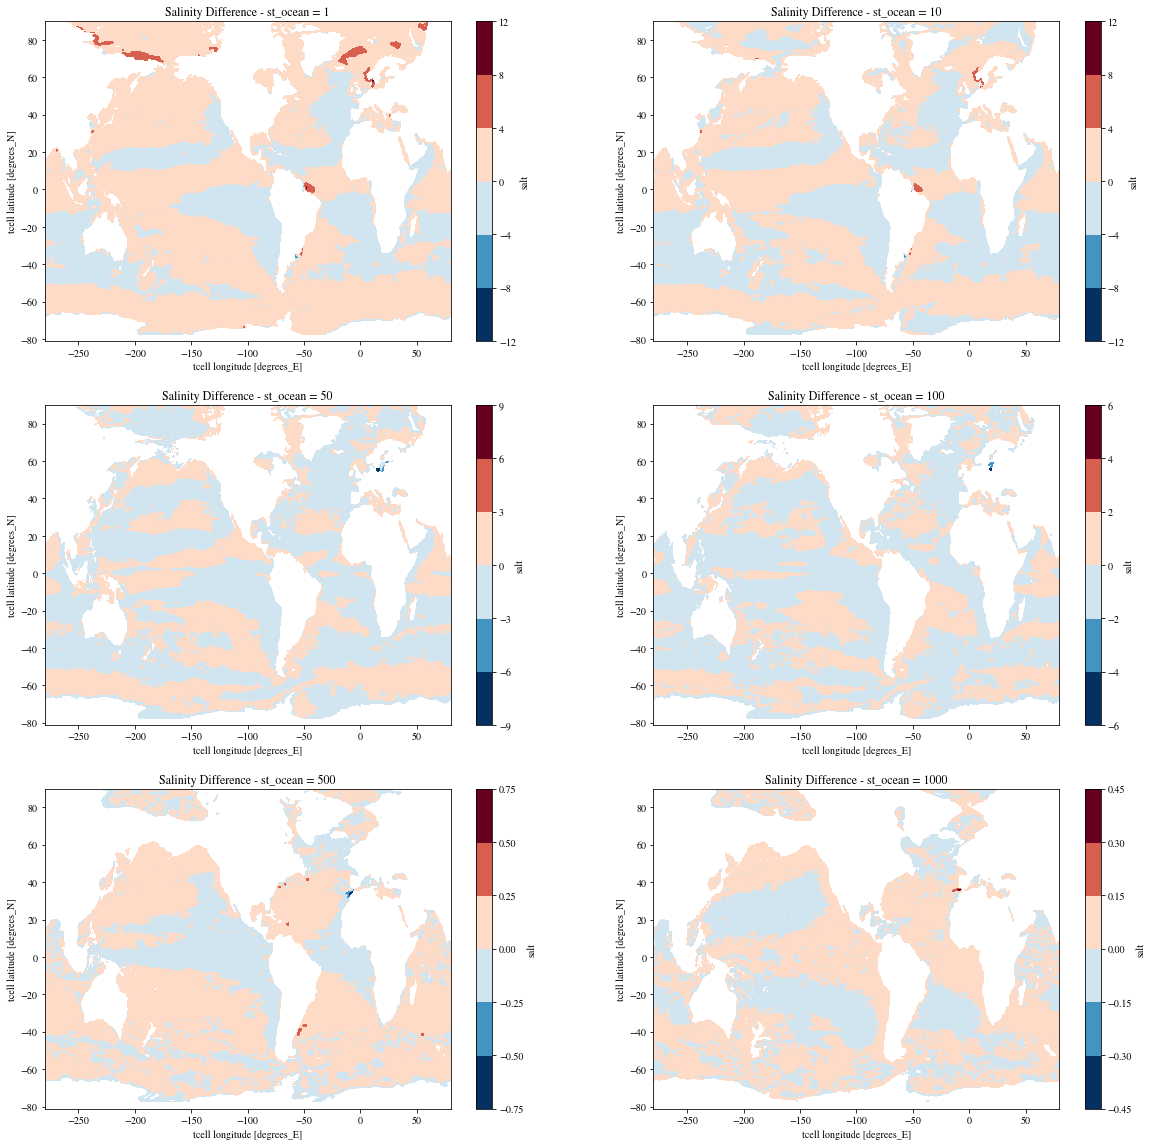

In [9]:
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(20,20))

(salt_con_1901 - salt_buo_1901).sel(st_ocean = 1, method = 'nearest').sel(time = slice('1900-01-01','1901-12-31')).mean('time').plot.contourf(ax = axes[0][0])
axes[0][0].set_title('Salinity Difference - st_ocean = 1')

(salt_con_1901 - salt_buo_1901).sel(st_ocean = 10, method = 'nearest').sel(time = slice('1900-01-01','1901-12-31')).mean('time').plot.contourf(ax = axes[0][1])
axes[0][1].set_title('Salinity Difference - st_ocean = 10')

(salt_con_1901 - salt_buo_1901).sel(st_ocean = 50, method = 'nearest').sel(time = slice('1900-01-01','1901-12-31')).mean('time').plot.contourf(ax = axes[1][0])
axes[1][0].set_title('Salinity Difference - st_ocean = 50')

(salt_con_1901 - salt_buo_1901).sel(st_ocean = 100, method = 'nearest').sel(time = slice('1900-01-01','1901-12-31')).mean('time').plot.contourf(ax = axes[1][1])
axes[1][1].set_title('Salinity Difference - st_ocean = 100')

(salt_con_1901 - salt_buo_1901).sel(st_ocean = 500, method = 'nearest').sel(time = slice('1900-01-01','1901-12-31')).mean('time').plot.contourf(ax = axes[2][0])
axes[2][0].set_title('Salinity Difference - st_ocean = 500')

(salt_con_1901 - salt_buo_1901).sel(st_ocean = 1000, method = 'nearest').sel(time = slice('1900-01-01','1901-12-31')).mean('time').plot.contourf(ax = axes[2][1])
axes[2][1].set_title('Salinity Difference - st_ocean = 1000')

In [48]:
pme_net_con = cc.querying.getvar(expt[0],'pme_net',session,start_time='1900-01-01',end_time = '1901-12-31')
pme_net_buo = cc.querying.getvar(expt[1],'pme_net',session,start_time='1900-01-01',end_time = '1901-12-31')

Text(0.5, 1.0, 'Salinity Difference - st_ocean = 1')

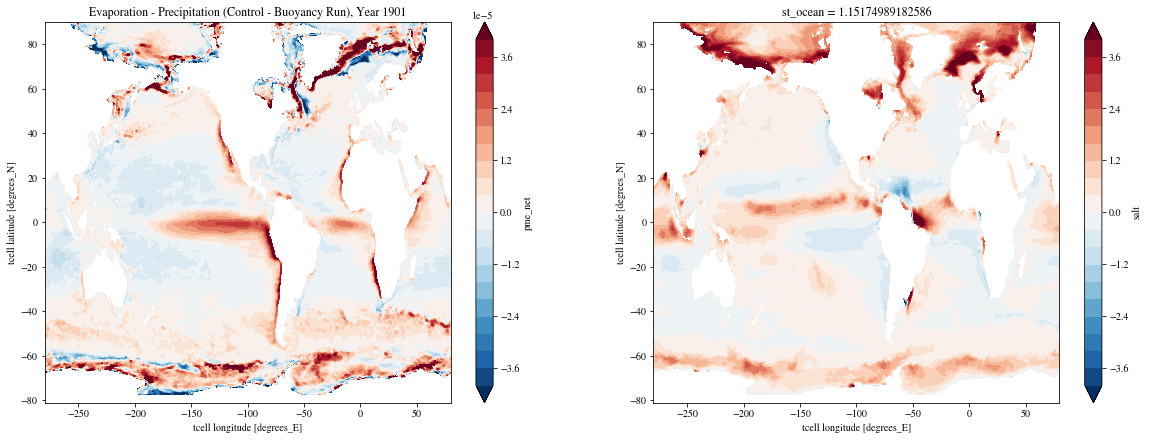

In [49]:
plt.figure(figsize=(20,7))
plt.subplot(121)
(pme_net_con - pme_net_buo).sel(time = slice('1900-01-01','1901-12-31')).mean('time').plot.contourf(levels = np.linspace(-4e-5,4e-5,21))
plt.title('Freshwater input (Control - Buoyancy Run), Year 1901')

plt.subplot(122)
(salt_con_1901-salt_buo_1901).sel(st_ocean = 1, method = 'nearest').sel(time = slice('1900-01-01','1901-12-31')).mean('time').plot.contourf(levels = np.linspace(-4,4,21))
axes[0][0].set_title('Salinity Difference - st_ocean = 1')

In [50]:
pme_net_con_1950 = cc.querying.getvar(expt[0],'pme_net',session,start_time='1949-01-01',end_time = '1950-12-31',frequency = '1 monthly')
pme_net_buo_1950 = cc.querying.getvar(expt[1],'pme_net',session,start_time='1949-01-01',end_time = '1950-12-31',frequency = '1 monthly')

Text(0.5, 1.0, 'Salinity Difference - st_ocean = 1')

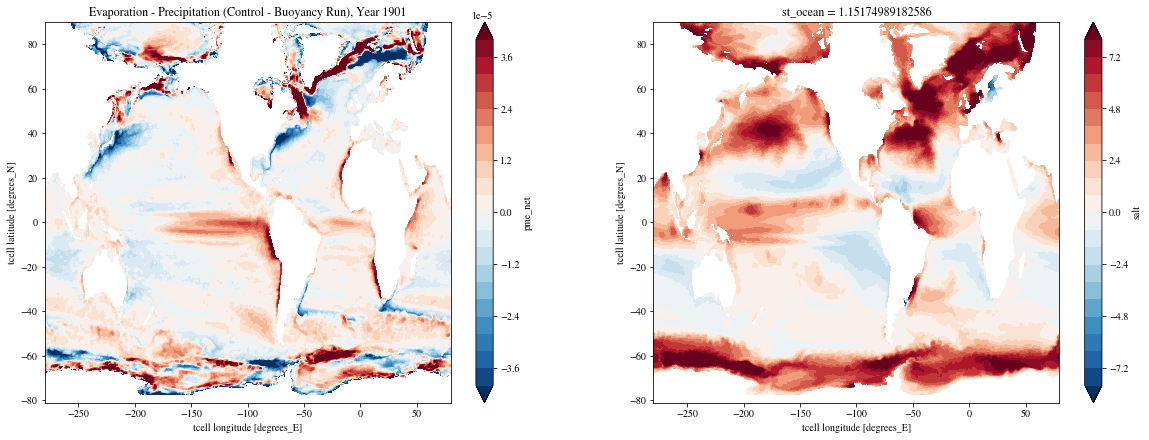

In [51]:
plt.figure(figsize=(20,7))
plt.subplot(121)
(pme_net_con_1950 - pme_net_buo_1950).sel(time = slice('1949-01-01','1950-12-31')).mean('time').plot.contourf(levels = np.linspace(-4e-5,4e-5,21))
plt.title('Freshwater input (Control - Buoyancy Run), Year 1901')

plt.subplot(122)
(salt_con_1950-salt_buo_1950).sel(st_ocean = 1, method = 'nearest').sel(time = slice('1949-01-01','1950-12-31')).mean('time').plot.contourf(levels = np.linspace(-8,8,21))
axes[0][0].set_title('Salinity Difference - st_ocean = 1')

In [38]:
from cosima_cookbook import explore
dbx = explore.DatabaseExplorer(session=session)
dbx

DatabaseExplorer(children=(HTML(value='<style>.header p{ line-height: 1.4; margin-bottom: 10px }</style>\n    …

In [59]:
salt_global_con = cc.querying.getvar(expt[0],'salt_global_ave',session,start_time='1901-01-01',end_time = '1950-12-31')
salt_global_buo = cc.querying.getvar(expt[1],'salt_global_ave',session,start_time='1901-01-01',end_time = '1950-12-31')

distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

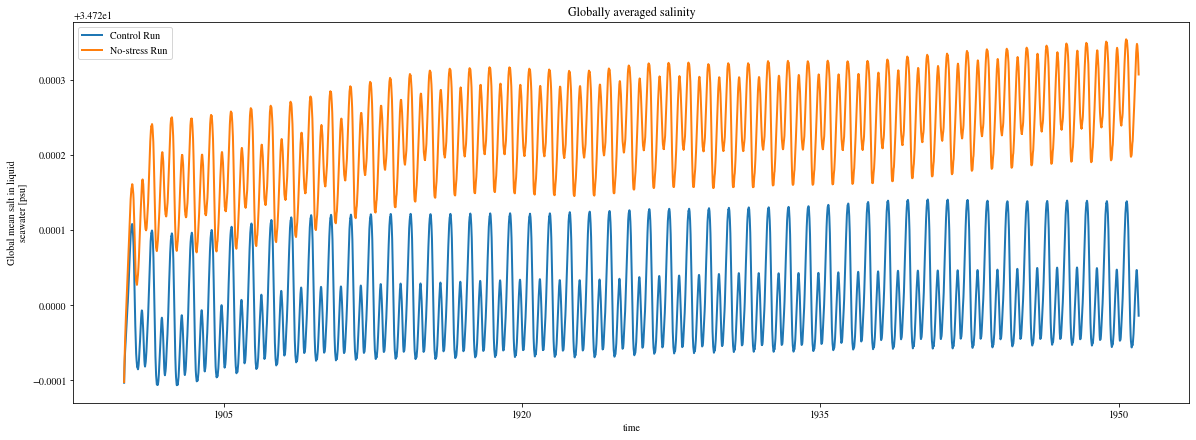

In [63]:
plt.figure(figsize=(20,7))
plt.subplot(111)
salt_global_con.plot()
salt_global_buo.plot()
plt.title('Globally averaged salinity')
plt.legend(['Control Run','No-stress Run']) 
plt.show()

In [68]:
variable='aice_m'
aice_con = cc.querying.getvar(expt[0], variable, session, frequency='1 monthly', start_time='1949-01-01', end_time='1950-12-31',decode_coords=False)
aice_buo = cc.querying.getvar(expt[1], variable, session, frequency='1 monthly', start_time='1949-01-01', end_time='1950-12-31',decode_coords=False)
area_t = cc.querying.getvar(expt='025deg_jra55_ryf_nostress', variable='area_t', session=session, frequency='static', n=1)

aice_con.coords['ni'] = area_t['xt_ocean'].values
aice_con.coords['nj'] = area_t['yt_ocean'].values
aice_con = aice_con.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))

aice_buo.coords['ni'] = area_t['xt_ocean'].values
aice_buo.coords['nj'] = area_t['yt_ocean'].values
aice_buo = aice_buo.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))

area_con = aice_con*area_t
area_buo = aice_buo*area_t

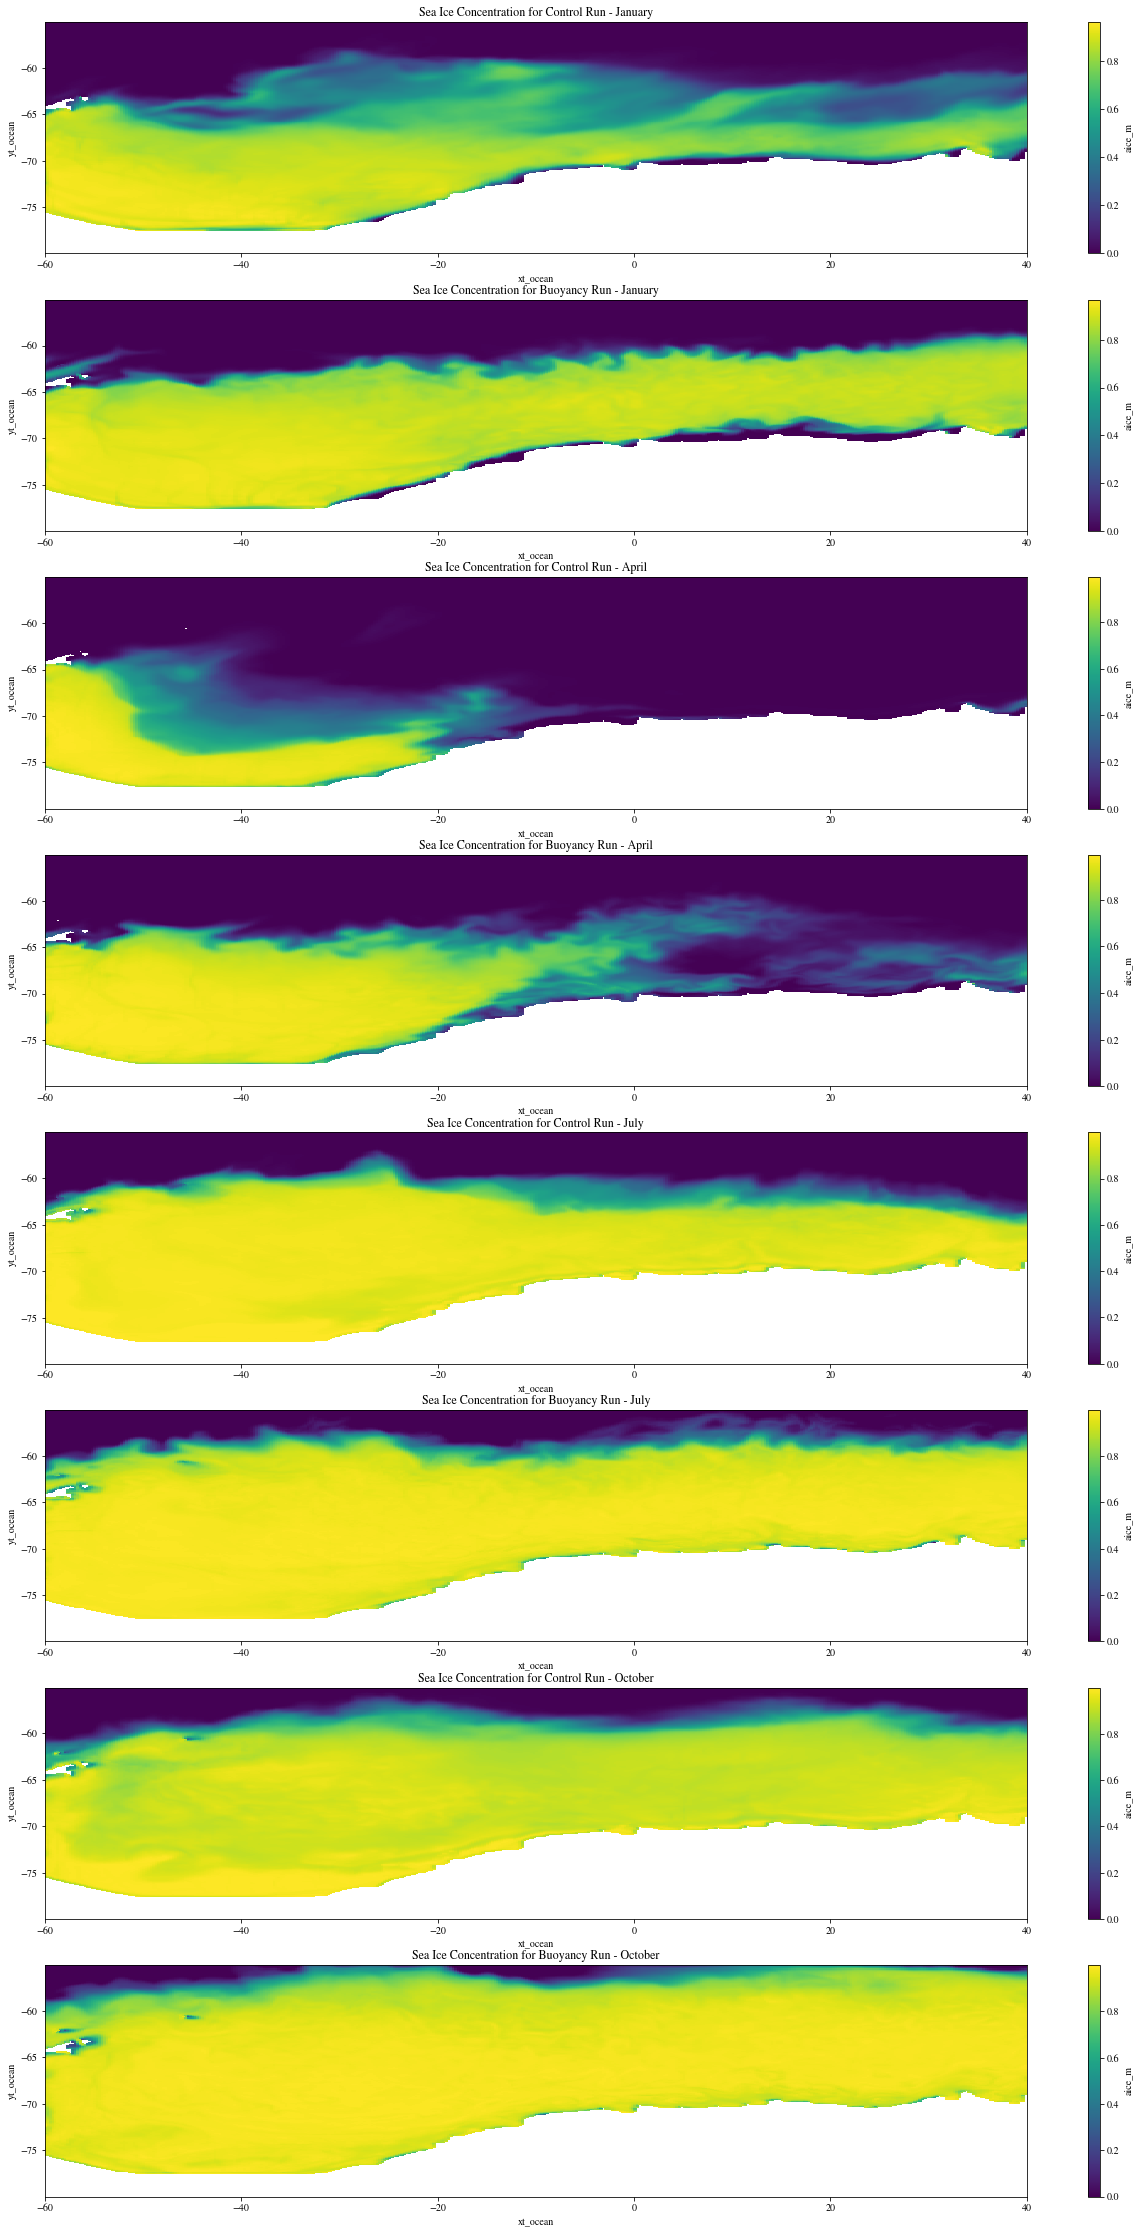

In [69]:
plt.figure(figsize=(22,40))

plt.subplot(811)
aice_con.sel(time = slice('1950-01-01','1950-01-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(-80,-55)).plot()
plt.title('Sea Ice Concentration for Control Run - January')
plt.savefig('SIC_cont_Jan.png')

plt.subplot(812)
aice_buo.sel(time = slice('1950-01-01','1950-01-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(-80,-55)).plot()
plt.title('Sea Ice Concentration for Buoyancy Run - January')
plt.savefig('SIC_buo_Jan.png')

plt.subplot(813)
aice_con.sel(time = slice('1950-04-01','1950-04-30')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(-80,-55)).plot()
plt.title('Sea Ice Concentration for Control Run - April')
plt.savefig('SIC_cont_Apr.png')

plt.subplot(814)
aice_buo.sel(time = slice('1950-04-01','1950-04-30')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(-80,-55)).plot()
plt.title('Sea Ice Concentration for Buoyancy Run - April')
plt.savefig('SIC_buo_Apr.png')

plt.subplot(815)
aice_con.sel(time = slice('1950-07-01','1950-07-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(-80,-55)).plot()
plt.title('Sea Ice Concentration for Control Run - July')
plt.savefig('SIC_cont_Jul.png')

plt.subplot(816)
aice_buo.sel(time = slice('1950-07-01','1950-07-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(-80,-55)).plot()
plt.title('Sea Ice Concentration for Buoyancy Run - July')
plt.savefig('SIC_buo_Jul.png')

plt.subplot(817)
aice_con.sel(time = slice('1950-10-01','1950-10-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(-80,-55)).plot()
plt.title('Sea Ice Concentration for Control Run - October')

plt.subplot(818)
aice_buo.sel(time = slice('1950-10-01','1950-10-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(-80,-55)).plot()
plt.title('Sea Ice Concentration for Buoyancy Run - October')

plt.show()

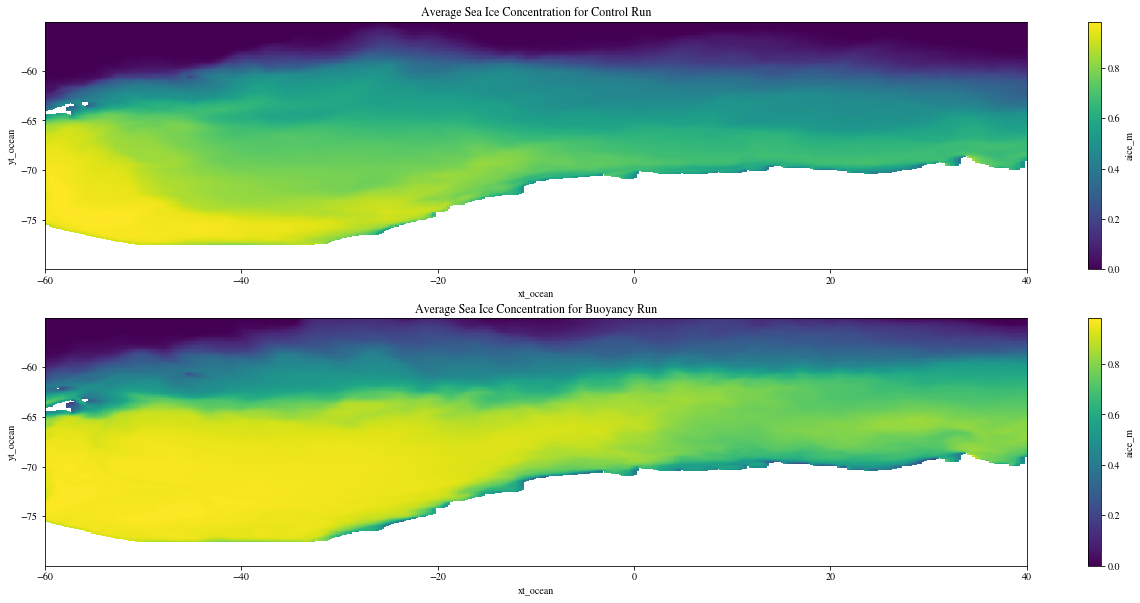

In [70]:
plt.figure(figsize=(22,10))

plt.subplot(211)
aice_con.sel(time = slice('1949-01-01','1950-12-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(-80,-55)).plot()
plt.title('Average Sea Ice Concentration for Control Run')
plt.savefig('SIC_cont_avg.png')

plt.subplot(212)
aice_buo.sel(time = slice('1949-01-01','1950-12-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(-80,-55)).plot()
plt.title('Average Sea Ice Concentration for Buoyancy Run')
plt.savefig('SIC_buo_avg.png')

In [71]:
## Arctic Region

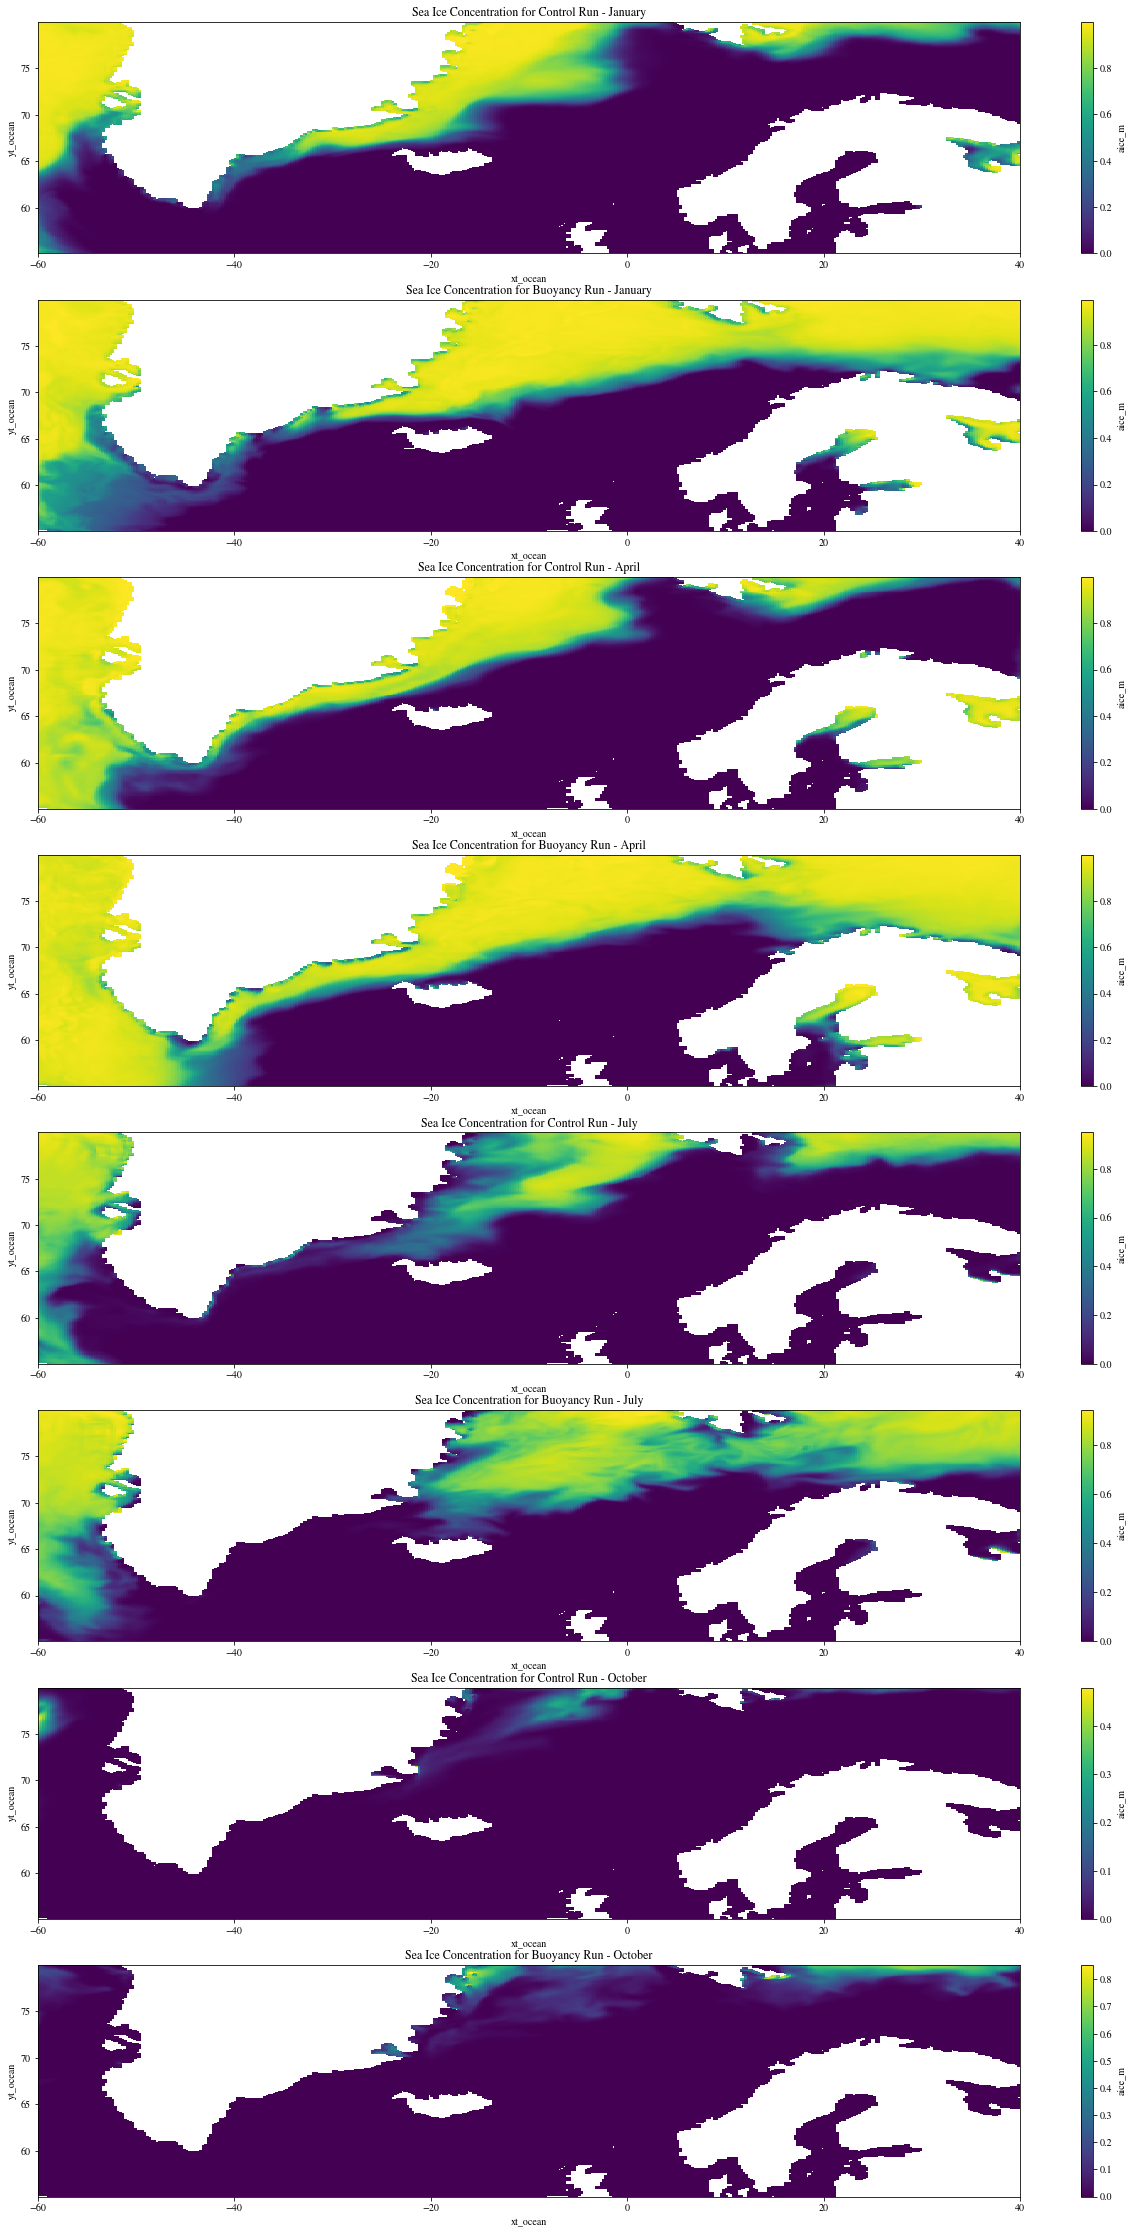

In [72]:
plt.figure(figsize=(22,40))

plt.subplot(811)
aice_con.sel(time = slice('1950-01-01','1950-01-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(55,80)).plot()
plt.title('Sea Ice Concentration for Control Run - January')
plt.savefig('SIC_cont_Jan.png')

plt.subplot(812)
aice_buo.sel(time = slice('1950-01-01','1950-01-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(55,80)).plot()
plt.title('Sea Ice Concentration for Buoyancy Run - January')
plt.savefig('SIC_buo_Jan.png')

plt.subplot(813)
aice_con.sel(time = slice('1950-04-01','1950-04-30')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(55,80)).plot()
plt.title('Sea Ice Concentration for Control Run - April')
plt.savefig('SIC_cont_Apr.png')

plt.subplot(814)
aice_buo.sel(time = slice('1950-04-01','1950-04-30')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(55,80)).plot()
plt.title('Sea Ice Concentration for Buoyancy Run - April')
plt.savefig('SIC_buo_Apr.png')

plt.subplot(815)
aice_con.sel(time = slice('1950-07-01','1950-07-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(55,80)).plot()
plt.title('Sea Ice Concentration for Control Run - July')
plt.savefig('SIC_cont_Jul.png')

plt.subplot(816)
aice_buo.sel(time = slice('1950-07-01','1950-07-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(55,80)).plot()
plt.title('Sea Ice Concentration for Buoyancy Run - July')
plt.savefig('SIC_buo_Jul.png')

plt.subplot(817)
aice_con.sel(time = slice('1950-10-01','1950-10-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(55,80)).plot()
plt.title('Sea Ice Concentration for Control Run - October')
plt.savefig('SIC_cont_Oct.png')

plt.subplot(818)
aice_buo.sel(time = slice('1950-10-01','1950-10-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(55,80)).plot()
plt.title('Sea Ice Concentration for Buoyancy Run - October')
plt.savefig('SIC_buo_Oct.png')

plt.show()

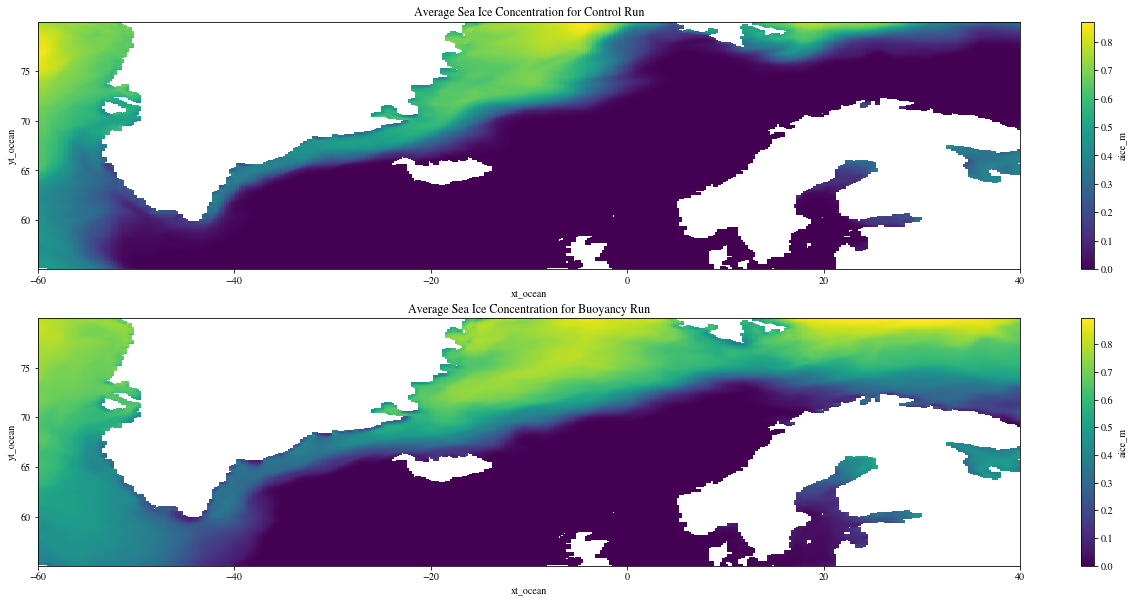

In [73]:
plt.figure(figsize=(22,10))

plt.subplot(211)
aice_con.sel(time = slice('1949-01-01','1950-12-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(55,80)).plot()
plt.title('Average Sea Ice Concentration for Control Run')
plt.savefig('SIC_cont_avg.png')

plt.subplot(212)
aice_buo.sel(time = slice('1949-01-01','1950-12-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(55,80)).plot()
plt.title('Average Sea Ice Concentration for Buoyancy Run')
plt.savefig('SIC_buo_avg.png')

In [29]:
wfiform_con = cc.querying.getvar(expt[0],'wfiform',session,start_time='1900-01-01',end_time = '1950-12-31')
wfiform_buo = cc.querying.getvar(expt[1],'wfiform',session,start_time='1900-01-01',end_time = '1950-12-31')

In [28]:
wfimelt_con = cc.querying.getvar(expt[0],'wfimelt',session,start_time='1900-01-01',end_time = '1950-12-31')
wfimelt_buo = cc.querying.getvar(expt[1],'wfimelt',session,start_time='1900-01-01',end_time = '1950-12-31')

Text(0.5, 1.0, 'Ice formation in Weddell gyre for Buoyancy Run')

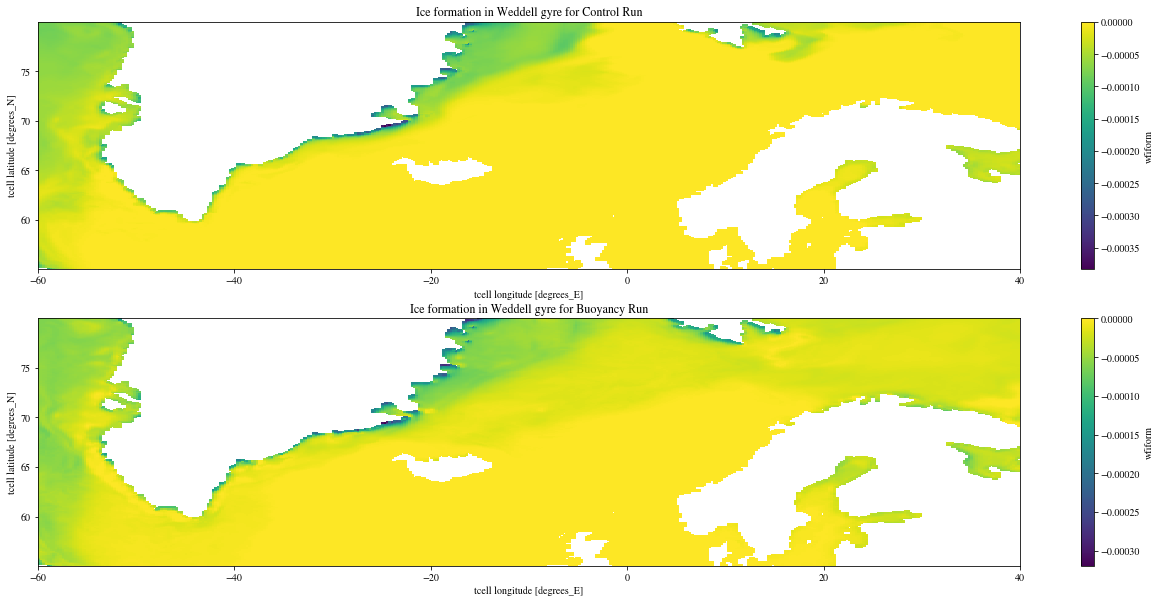

In [15]:
plt.figure(figsize=(22,10))

plt.subplot(211)
wfiform_con.sel(time = slice('1949-01-01','1950-12-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(55,80)).plot()
plt.title('Ice formation in Weddell gyre for Control Run')

plt.subplot(212)
wfiform_buo.sel(time = slice('1949-01-01','1950-12-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(55,80)).plot()
plt.title('Ice formation in Weddell gyre for Buoyancy Run')

Text(0.5, 1.0, 'Ice melting in Weddell gyre for Buoyancy Run')

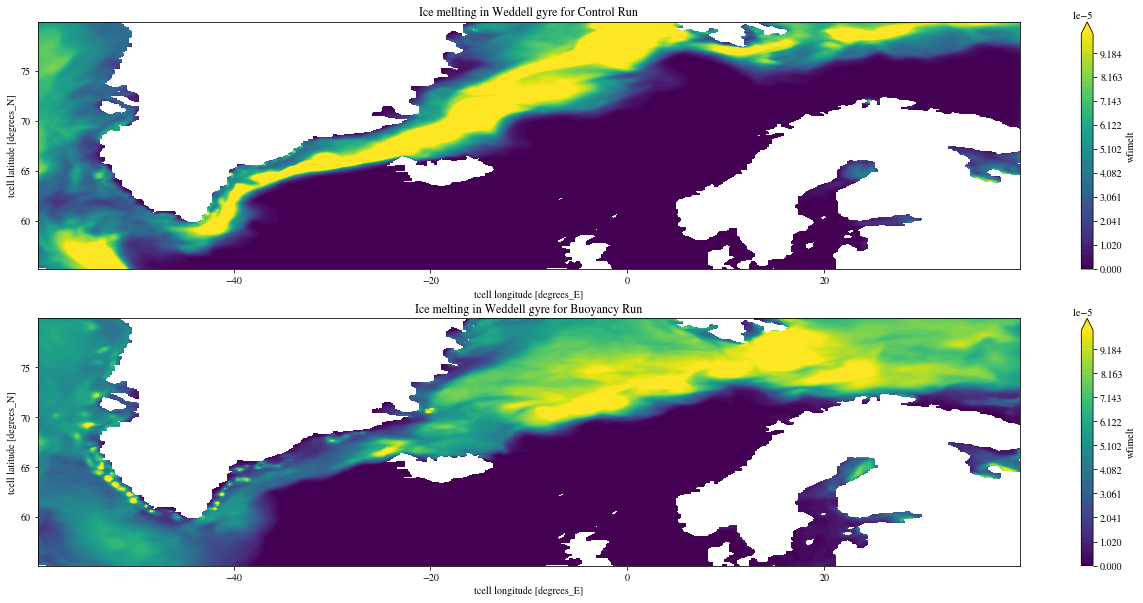

In [18]:
plt.figure(figsize=(22,10))

plt.subplot(211)
wfimelt_con.sel(time = slice('1949-01-01','1950-12-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(55,80)).plot.contourf(levels = np.linspace(0,1e-4))
plt.title('Ice mellting in Weddell gyre for Control Run')

plt.subplot(212)
wfimelt_buo.sel(time = slice('1949-01-01','1950-12-31')).mean('time').sel(xt_ocean = slice(-60,40)).sel(yt_ocean = slice(55,80)).plot.contourf(levels = np.linspace(0,1e-4))
plt.title('Ice melting in Weddell gyre for Buoyancy Run')

In [34]:
area_t = cc.querying.getvar(expt=expt[0], variable='area_t', session=session, frequency='static', n=1)#.sel(
#    xt_ocean = slice(-60,40)).sel(yt_ocean = slice(55,80))
wfimelt_avg_con = (wfimelt_con*area_t).sum(dim = ['yt_ocean','xt_ocean'])/area_t.sum(dim = ['yt_ocean','xt_ocean'])
wfimelt_avg_buo = (wfimelt_buo*area_t).sum(dim = ['yt_ocean','xt_ocean'])/area_t.sum(dim = ['yt_ocean','xt_ocean'])

In [37]:
wfiform_avg_con = (wfimelt_con*area_t).sum(dim = ['yt_ocean','xt_ocean'])/area_t.sum(dim = ['yt_ocean','xt_ocean'])
wfiform_avg_buo = (wfimelt_buo*area_t).sum(dim = ['yt_ocean','xt_ocean'])/area_t.sum(dim = ['yt_ocean','xt_ocean'])

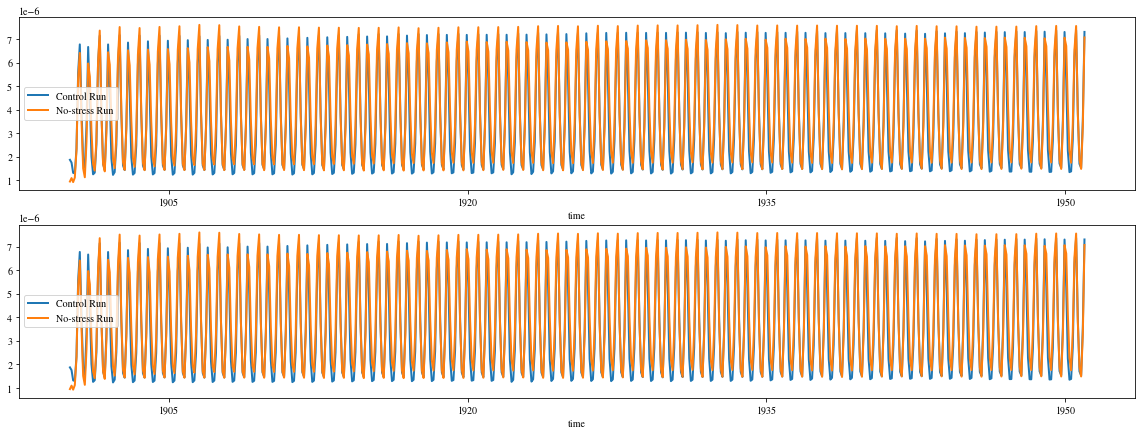

In [38]:
plt.figure(figsize = (20,14))

plt.subplot(211)
wfimelt_avg_con.plot()
wfimelt_avg_buo.plot()
plt.title('Time series of sea icea melting')
plt.legend(['Control Run','No-stress Run']) 

plt.subplot(212)
wfiform_avg_con.plot()
wfiform_avg_buo.plot()
plt.title('Time series of se ice formation')
plt.legend(['Control Run','No-stress Run']) 

plt.show()

In [57]:
psi_con = cc.querying.getvar(expt[0],'ty_trans_rho',session,start_time = '1949-01-01',end_time = '1950-12-31')
psi_con = psi_con.sum('grid_xt_ocean')
rho = 1025 # mean density of sea-water in kg/m^3
psi_con = psi_con / (1e6*rho) # converts kg/s to Sv
psi_avg_con = psi_con.cumsum('potrho').mean('time') - psi_con.sum('potrho').mean('time')

psi_buo = cc.querying.getvar(expt[1],'ty_trans_rho',session,start_time = '1949-01-01',end_time = '1950-12-31')
psi_buo = psi_buo.sum('grid_xt_ocean')
rho = 1025 # mean density of sea-water in kg/m^3
psi_buo = psi_buo / (1e6*rho) # converts kg/s to Sv
psi_avg_buo = psi_buo.cumsum('potrho').mean('time') - psi_buo.sum('potrho').mean('time')

KeyError: 0

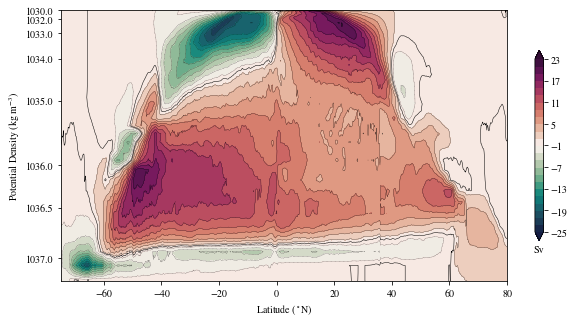

In [58]:
fig,ax = plt.subplots(1,1,figsize=(10, 5)) 
clev = np.arange(-25,25,2)
yticks = np.array([1030, 1032, 1033, 1034, 1035, 1036,1036.5, 1037])
scfac = 4  ## A power to set teh stretching
p1=ax.contourf(psi_avg_con.grid_yu_ocean,(psi_avg_con.potrho-1028)**scfac, psi_avg_con, cmap=cm.cm.curl, levels=clev, extend='both')
cb=plt.colorbar(p1,orientation='vertical', shrink = 0.7)
    
cb.ax.set_xlabel('Sv')
ax.contour(psi_avg_con.grid_yu_ocean,(psi_avg_con.potrho-1028)**scfac, psi_avg_con, levels=clev, colors='k', linewidths=0.25)
ax.contour(psi_avg_con.grid_yu_ocean,(psi_avg_con.potrho-1028)**scfac, psi_avg_con, levels=[0.0,], colors='k', linewidths=0.5)

ax.set_yticks((yticks-1028)**scfac)
ax.set_yticklabels(yticks)
ax.set_ylim([0.5**scfac, 9.2**scfac])
ax.invert_yaxis()
ax.set_ylabel('Potential Density (kg m$^{-3}$)')
ax.set_xlabel('Latitude ($^\circ$N)')
ax.set_xlim([-75,80])
ax.set_title('Overturning for control run');

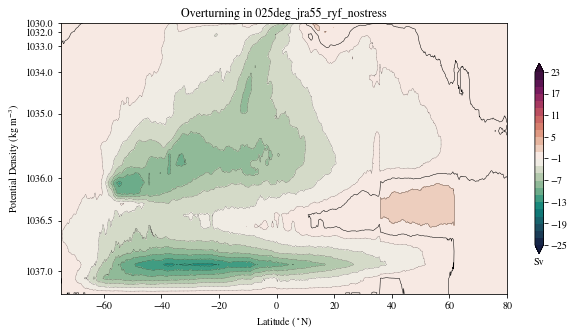

In [59]:
fig,ax = plt.subplots(1,1,figsize=(10, 5)) 
clev = np.arange(-25,25,2)
yticks = np.array([1030, 1032, 1033, 1034, 1035, 1036,1036.5, 1037])
scfac = 4  ## A power to set teh stretching
p1=ax.contourf(psi_avg_buo.grid_yu_ocean,(psi_avg_buo.potrho-1028)**scfac, psi_avg_buo, cmap=cm.cm.curl, levels=clev, extend='both')
cb=plt.colorbar(p1,orientation='vertical', shrink = 0.7)
    
cb.ax.set_xlabel('Sv')
ax.contour(psi_avg_buo.grid_yu_ocean,(psi_avg_buo.potrho-1028)**scfac, psi_avg_buo, levels=clev, colors='k', linewidths=0.25)
ax.contour(psi_avg_buo.grid_yu_ocean,(psi_avg_buo.potrho-1028)**scfac, psi_avg_buo, levels=[0.0,], colors='k', linewidths=0.5)

ax.set_yticks((yticks-1028)**scfac)
ax.set_yticklabels(yticks)
ax.set_ylim([0.5**scfac, 9.2**scfac])
ax.invert_yaxis()
ax.set_ylabel('Potential Density (kg m$^{-3}$)')
ax.set_xlabel('Latitude ($^\circ$N)')
ax.set_xlim([-75,80])
ax.set_title('Overturning in %s' % expt[1]);

In [ ]:
psi_con = cc.querying.getvar(expt[0],'ty_trans_int_z',session,start_time = '1949-01-01',end_time = '1950-12-31')
psi_con = psi_con.sum('xt_ocean')
rho = 1025 # mean density of sea-water in kg/m^3
psi_con = psi_con / (1e6*rho) # converts kg/s to Sv
psi_avg_con = psi_con.cumsum('potrho').mean('time') - psi.sum('potrho').mean('time')

psi_buo = cc.querying.getvar(expt[1],'ty_trans_rho',session,start_time = '1949-01-01',end_time = '1950-12-31')
psi_buo = psi_buo.sum('grid_xt_ocean')
rho = 1025 # mean density of sea-water in kg/m^3
psi_buo = psi_buo / (1e6*rho) # converts kg/s to Sv
psi_avg_buo = psi_buo.cumsum('potrho').mean('time') - psi.sum('potrho').mean('time')